In [1]:
%run pylib/summary dark 
self = Summary(  title="""Appply KDE to GU candidates.""")
df = self.df.copy()


# Appply KDE to GU candidates.

<h5 style="text-align:right; margin-right:15px"> 2023-10-21 09:53</h5>

* Read file `files/fgl_summary.csv` with 2625 sources.

## KDE analysis 
vars: ['log_epeak', 'log_fpeak', 'd', 'diffuse']

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc704e78430>
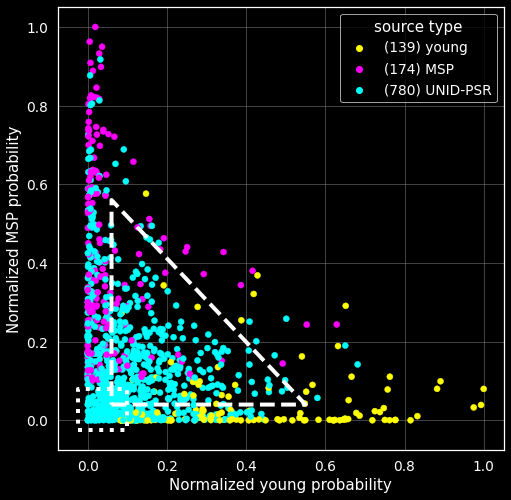

Selected 479 of the UNID-PSR sources inside the square and triangular regions

In [111]:
%run pylib/kde
def kde_check(cols = 'log_epeak log_fpeak d diffuse'.split()):
    tdf = df.copy()
    for t in 'young MSP'.split():
        gde = Gaussian_kde( df[df['source type']==t],  cols)
        arg ='pdf_'+t
        u = gde(df)
        tdf[arg] = u/np.max(u)
    
    fig, ax = plt.subplots(figsize=(8,8))
    size_kw = dict(size='log TS', sizes=(20,100) )
    hue_kw = dict(hue='source type', hue_order='young MSP UNID-PSR'.split(),
                 palette='yellow magenta cyan'.split(), edgecolor=None)
    x,y =tdf.pdf_young, tdf.pdf_MSP
    sns.scatterplot(tdf, ax=ax,  x=x, y=y,  **hue_kw)#, **size_kw);
    update_legend(ax, df, hue='source type' )
    ax.set(xlabel='Normalized young probability', ylabel='Normalized MSP probability')
    show(f"""## KDE analysis 
        vars: {cols}""")
    return ax, tdf
ax, df = kde_check('log_epeak log_fpeak d diffuse'.split())

class Triangle:
    def __init__(self, ax, x=(0.06,0.55), y=(0.04, 0.56)):
        a,b = x
        c,d = y
        alpha = (c-d)/(b-a)
        beta = c-alpha*b
        # inside is in the triangle or rectangle at origin
        self.inside = lambda x,y: ((x>a) & (y>c)  & (y < alpha*x+beta ))  | ((x<a) & (y<c))
        ax.plot([a,b,a,a], [c,c,d, c], '--', color='1.', lw=4)

    def __call__(self, df, x, y):
        return self.inside(df[x],df[y])     
class Square(Triangle):
    def __init__(self, ax, a=0.1, b=0.08):
        z=-0.025
        self.inside =  lambda x,y: (x<a) & (y<b)
        ax.plot([z, a, a, z, z] , [z, z, b,b,z], ':', color='1.', lw=4)

t = Triangle(ax)
s = Square(ax)
show(ax.figure)
pars =df[df['source type']=='UNID-PSR'],  'pdf_young', 'pdf_MSP' 
q = t(*pars) | s(*pars)
show(f'Selected {sum(q)} of the UNID-PSR sources inside the square and triangular regions')

### Positions of 479 selected

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc704e9f310>
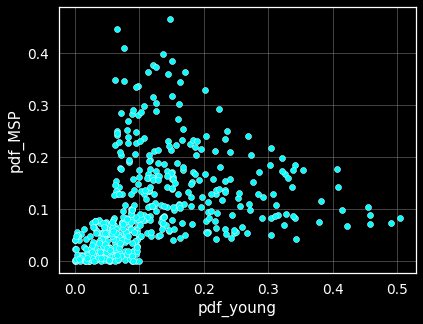

In [112]:
show(f"""### Positions of {sum(q)} selected""")
show(sns.scatterplot(unid_psr[q], x='pdf_young', y='pdf_MSP', color='cyan').figure)

In [114]:
gu_file = 'files/gu_candidates.csv'

unid_psr[q]['glon glat d Fp Ep diffuse pdf_young pdf_MSP'.split()].to_csv(gu_file, float_format='%.3f')
show(f"""* Wrote {sum(q)} GU candidate sources to {gu_file}""")

* Wrote 479 GU candidate sources to files/gu_candidates.csv

## KDE analysis 
vars: ['log_epeak', 'log_fpeak', 'd', 'diffuse']

glon             14.893
glat            -42.434
ts             3996.788
r95               0.015
diffuse          -0.052
d                 0.905
Fp               30.128
Ep                2.167
source type    UNID-PSR
log_epeak      0.335859
log_fpeak       1.47897
log TS         3.601711
abs_sin_b       0.67474
log_diff         -0.052
pdf_young      0.081301
pdf_MSP        0.250945
Name: 4FGL J2112.5-3043, dtype: object

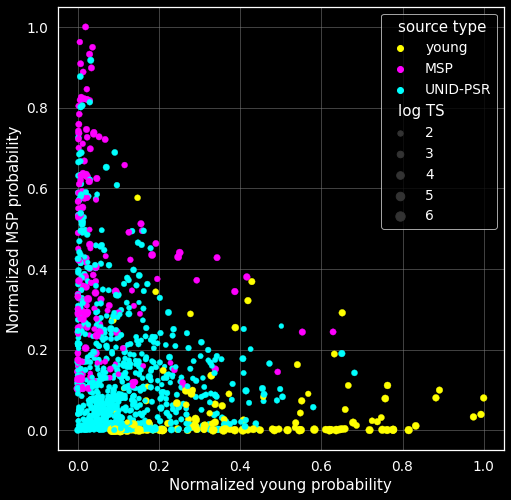

In [3]:
_,tdf = kde_check(); tdf.loc['4FGL J2112.5-3043']

In [ ]:
self.hue_kw.update(palette='yellow magenta cyan'.split(), edgecolor=None)
unid_psr['non-psr'] = q

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc7029bda80>
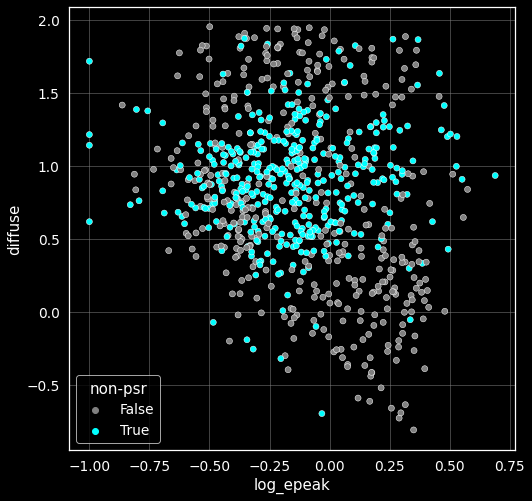

In [92]:
fig,ax = plt.subplots(figsize=(8,8))
sns.scatterplot(unid_psr, ax=ax, y='diffuse', x='log_epeak', hue='non-psr', palette='grey cyan'.split() );
show(ax.figure)

* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_v07_hpx.fits`<br>  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$<br>  select energy= 893 MeV

### Peak flux vs. diffuse 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc707041e40>
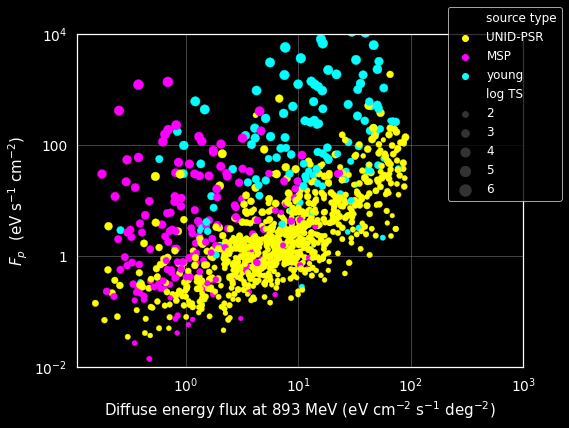

In [5]:
from pylib.diffuse import Diffuse
diff = Diffuse()
def fp_vs_diffuse(self):
    fig, ax = plt.subplots(figsize=(8,6))
    size_kw = dict(size='log TS', sizes=(20,150) )
    sns.scatterplot(self.df,ax=ax, x='diffuse',y='log_fpeak', **self.hue_kw, **size_kw );
    plt.legend(loc='upper right', fontsize=12,bbox_to_anchor=(1.1,1.1));
    ax.set(**diff.fluxticks('x'), **fpeak_kw('y'), ylim=(-2,4));
    return fig
show(f"""### Peak flux vs. diffuse """)
show(fp_vs_diffuse(self))

### Log(Fp/diffuse) 
Units are $\log(10^6\ \rm{eV^2\ sr})= 6+\ log(\rm{eV^2\ sr)}$ 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc70e78d480>
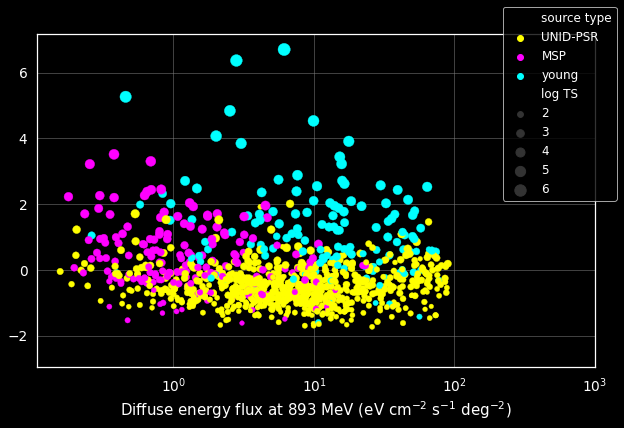

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
size_kw = dict(size='log TS', sizes=(20,150) )
sns.scatterplot(df,ax=ax, x='diffuse',y=df.log_fpeak-df.diffuse, **self.hue_kw, **size_kw );
plt.legend(loc='upper right', fontsize=12,bbox_to_anchor=(1.05,1.1))
ax.set(**diff.fluxticks('x'));#, **fpeak_kw('y'), ylim=(-2,4));
show(r"""### Log(Fp/diffuse) 
Units are $\log(10^6\ \rm{eV^2\ sr})= 6+\ log(\rm{eV^2\ sr)}$ """)
show(fig)

### Ep vs. diffuse 
 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc70e72d750>
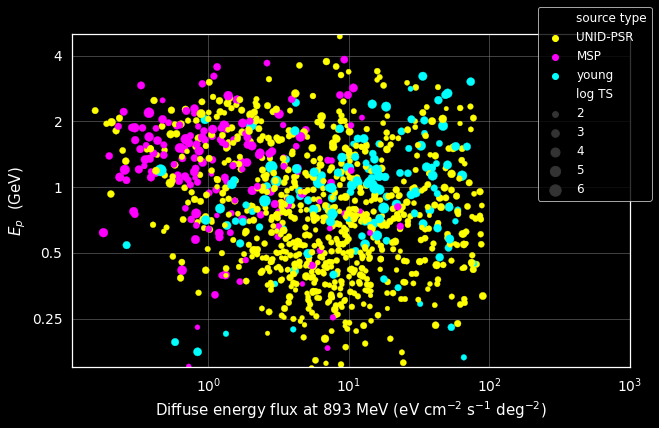

In [7]:
def epeak_kw(axis='x', ticks=np.logspace(-1,3,4 )):
    return {axis+'label':'$E_p$  (GeV)',
            axis+'ticks': np.log10(ticks),
            axis+'ticklabels': ticks,
            }
fig, ax = plt.subplots(figsize=(10,6))
size_kw = dict(size='log TS', sizes=(20,150) )
sns.scatterplot(df,ax=ax, x='diffuse',y=df.log_epeak, **self.hue_kw, **size_kw );
plt.legend(loc='upper right', fontsize=12,bbox_to_anchor=(1.05,1.1))
ax.set(**diff.fluxticks('x'), **epeak_kw('y',[0.25,0.5,1,2,4]), ylim=np.log10((0.15, 5)));#, **fpeak_kw('y'), ylim=(-2,4));
show(r"""### Ep vs. diffuse 
 """)
show(fig)

* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_v07_hpx.fits`<br>  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$<br>  select energy= 893 MeV

## Diffuse flux value at sources 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc70e63bf10>
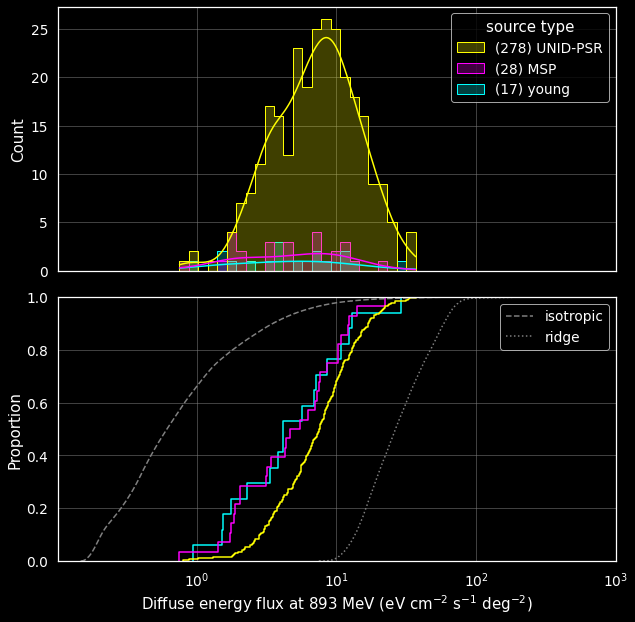

In [8]:
from pylib.diffuse import *     
diff = Diffuse()
kw = self.hue_kw
kw.pop('edgecolor')
diff.show_diffuse_flux( df[q], self.hue_kw)

## KDE analysis 
vars: ['log_epeak', 'd', 'diffuse']

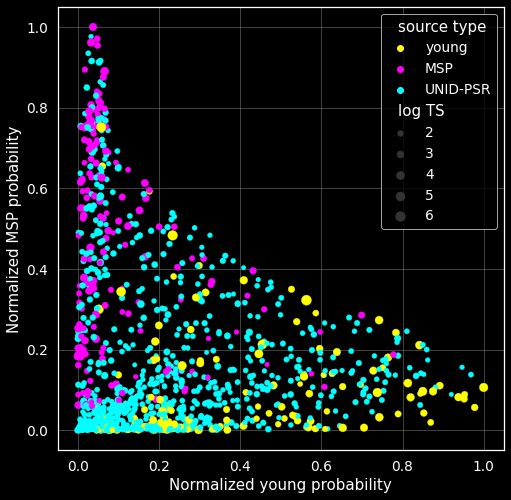

In [9]:
kde_check('log_epeak  d diffuse'.split());

## KDE analysis 
vars: ['log_epeak', 'log_fpeak', 'd', 'glon', 'glat']

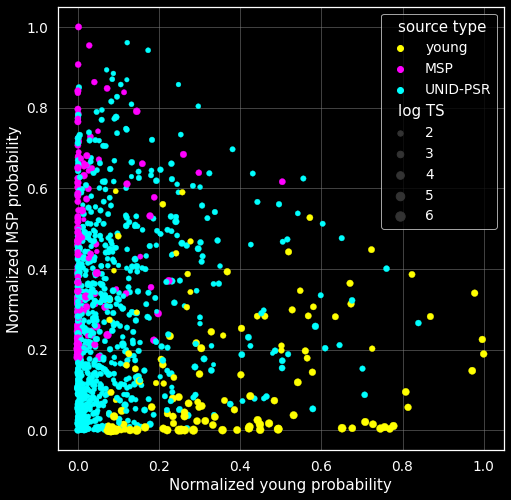

In [10]:
kde_check('log_epeak log_fpeak  d glon glat'.split());